In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import geopandas as gpd
from shapely.geometry import Point, Polygon

import folium
from folium import Map
from folium.map import Layer, FeatureGroup,LayerControl,Marker
from folium.plugins import MarkerCluster,FeatureGroupSubGroup,Fullscreen

In [2]:
incidents = pd.read_csv('./geocoded_fire_incidents_data.csv')

In [3]:
incidents.head()

,action_taken1_desc,action_taken2_desc,action_taken3_desc,aes_presence_desc,arrival_date_time,borough_desc,co_detector_present_desc,detector_presence_desc,fire_box,fire_origin_below_grade_flag,...,standpipe_sys_present_flag,story_fire_origin_count,street_highway,total_incident_duration,units_onscene,zip_code,borough,incident_type_num,lat,lon
0,11 - Extinguishment by fire service personnel,51 - Ventilate,NaN,NaN,2018-06-30T23:58:53.000,2 - Bronx,NaN,NaN,2135.0,NaN,...,NaN,NaN,BROWN PL,1508.0,5.0,10454,Bronx,117,40.806936,-73.920758
1,11 - Extinguishment by fire service personnel,NaN,NaN,NaN,2018-06-30T23:30:01.000,1 - Manhattan,NaN,NaN,470.0,NaN,...,NaN,NaN,E 14 ST,1664.0,6.0,10009,Manhattan,151,40.730498,-73.980579
2,11 - Extinguishment by fire service personnel,NaN,NaN,NaN,2018-06-30T22:17:14.000,4 - Brooklyn,NaN,NaN,1646.0,NaN,...,NaN,NaN,PROSPECT PL,982.0,1.0,11233,Brooklyn,151,40.672573,-73.918211
3,11 - Extinguishment by fire service personnel,51 - Ventilate,64 - Shut down system,NaN,2018-06-30T22:11:36.000,1 - Manhattan,NaN,NaN,1271.0,NaN,...,NaN,NaN,AMSTERDAM AVE,1213.0,5.0,10025,Manhattan,117,40.798765,-73.966942
4,11 - Extinguishment by fire service personnel,52 - Forcible entry,"112 - Stretch 1 3/4"" line, extinguish fire",NaN,2018-06-30T21:27:59.000,2 - Bronx,NaN,NaN,2411.0,NaN,...,NaN,NaN,BRYANT AVE,1010.0,1.0,10474,Bronx,151,40.814251,-73.885474


In [4]:
incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99212 entries, 0 to 99211
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   action_taken1_desc            99212 non-null  object 
 1   action_taken2_desc            47413 non-null  object 
 2   action_taken3_desc            26314 non-null  object 
 3   aes_presence_desc             14116 non-null  object 
 4   arrival_date_time             97990 non-null  object 
 5   borough_desc                  99212 non-null  object 
 6   co_detector_present_desc      289 non-null    object 
 7   detector_presence_desc        14116 non-null  object 
 8   fire_box                      99209 non-null  float64
 9   fire_origin_below_grade_flag  2042 non-null   float64
 10  fire_spread_desc              14117 non-null  object 
 11  floor                         37923 non-null  object 
 12  highest_level_desc            99082 non-null  object 
 13  i

In [5]:
incidents['incident_type_desc'].value_counts()

151 - Outside rubbish, trash or waste fire                  29588
200 - Overpressure rupture, explosion, overheat other       14555
111 - Building fire                                         14105
116 - Fuel burner/boiler malfunction, fire confined         10455
118 - Trash or rubbish fire, contained                       9558
100 - Fire, other                                            8473
112 - Fires in structure other than in a building            6706
117 - Commercial Compactor fire, confined to rubbish         2725
150 - Outside rubbish fire, other                            1074
130 - Mobile property (vehicle) fire, other                   418
160 - Special outside fire, other                             282
114 - Chimney or flue fire, confined to chimney or flue       244
115 - Incinerator overload or malfunction, fire confined      225
162 - Outside equipment fire                                  175
210 - Overpressure rupture from steam, other                  142
154 - Dump

In [6]:
geom = [Point(xy) for xy in zip(incidents['lon'],incidents['lat'])]

In [7]:
incidents_gdf = gpd.GeoDataFrame(incidents,geometry = geom)
incidents_gdf.head()

,action_taken1_desc,action_taken2_desc,action_taken3_desc,aes_presence_desc,arrival_date_time,borough_desc,co_detector_present_desc,detector_presence_desc,fire_box,fire_origin_below_grade_flag,...,story_fire_origin_count,street_highway,total_incident_duration,units_onscene,zip_code,borough,incident_type_num,lat,lon,geometry
0,11 - Extinguishment by fire service personnel,51 - Ventilate,NaN,NaN,2018-06-30T23:58:53.000,2 - Bronx,NaN,NaN,2135.0,NaN,...,NaN,BROWN PL,1508.0,5.0,10454,Bronx,117,40.806936,-73.920758,POINT (-73.92076 40.80694)
1,11 - Extinguishment by fire service personnel,NaN,NaN,NaN,2018-06-30T23:30:01.000,1 - Manhattan,NaN,NaN,470.0,NaN,...,NaN,E 14 ST,1664.0,6.0,10009,Manhattan,151,40.730498,-73.980579,POINT (-73.98058 40.73050)
2,11 - Extinguishment by fire service personnel,NaN,NaN,NaN,2018-06-30T22:17:14.000,4 - Brooklyn,NaN,NaN,1646.0,NaN,...,NaN,PROSPECT PL,982.0,1.0,11233,Brooklyn,151,40.672573,-73.918211,POINT (-73.91821 40.67257)
3,11 - Extinguishment by fire service personnel,51 - Ventilate,64 - Shut down system,NaN,2018-06-30T22:11:36.000,1 - Manhattan,NaN,NaN,1271.0,NaN,...,NaN,AMSTERDAM AVE,1213.0,5.0,10025,Manhattan,117,40.798765,-73.966942,POINT (-73.96694 40.79877)
4,11 - Extinguishment by fire service personnel,52 - Forcible entry,"112 - Stretch 1 3/4"" line, extinguish fire",NaN,2018-06-30T21:27:59.000,2 - Bronx,NaN,NaN,2411.0,NaN,...,NaN,BRYANT AVE,1010.0,1.0,10474,Bronx,151,40.814251,-73.885474,POINT (-73.88547 40.81425)


<AxesSubplot:>

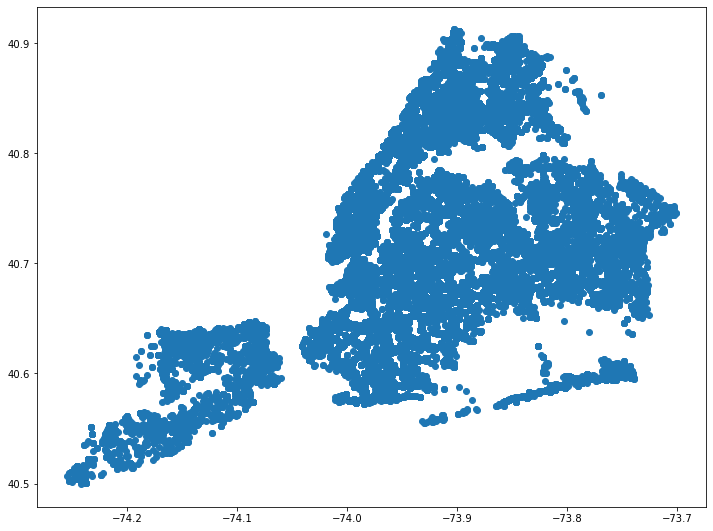

In [8]:
incidents_gdf.plot(figsize = (12,12))

Cool, this looks roughly like the five boroughs of NYC. So let's get started on making a web map.

In [9]:
set(incidents['incident_type_desc'])

{'100 - Fire, other',
 '111 - Building fire',
 '112 - Fires in structure other than in a building',
 '114 - Chimney or flue fire, confined to chimney or flue',
 '115 - Incinerator overload or malfunction, fire confined',
 '116 - Fuel burner/boiler malfunction, fire confined',
 '117 - Commercial Compactor fire, confined to rubbish',
 '118 - Trash or rubbish fire, contained',
 '120 - Fire in mobile prop. used as a fixed struc., other',
 '121 - Fire in mobile home used as fixed residence',
 '122 - Fire in motor home, camper, recreational vehicle',
 '130 - Mobile property (vehicle) fire, other',
 '138 - Off-road vehicle or heavy equipment fire',
 '150 - Outside rubbish fire, other',
 '151 - Outside rubbish, trash or waste fire',
 '154 - Dumpster or other outside trash receptacle fire',
 '160 - Special outside fire, other',
 '161 - Outside storage fire',
 '162 - Outside equipment fire',
 '163 - Outside gas or vapor combustion explosion',
 '200 - Overpressure rupture, explosion, overheat oth

In [10]:
len(incidents_gdf[incidents_gdf['incident_type_num'] > 200])

432

In [11]:
## ALL EVENTS (too big :( )
# type_dict = {}

# for incident_type in set(incidents_gdf['incident_type_desc']):
#     type_dict[incident_type] = incidents_gdf[incidents_gdf['incident_type_desc']==incident_type].reset_index(drop = True)

In [12]:
# ## Still too big
# incidents_subset = incidents_gdf[incidents_gdf['incident_type_num'].isin([100,111,112,115,120,163])].reset_index(drop = True)

# type_dict = {}

# for incident_type in set(incidents_subset['incident_type_desc']):
#     type_dict[incident_type] = incidents_subset[incidents_subset['incident_type_desc']==incident_type].reset_index(drop = True)

In [13]:
## Just explosions & ruptures subset
explosions = incidents_gdf[incidents_gdf['incident_type_num'] > 200].reset_index(drop = True)
type_dict = {}

for incident_type in set(explosions['incident_type_desc']):
    type_dict[incident_type] = explosions[explosions['incident_type_desc']==incident_type].reset_index(drop = True)

In [14]:
def make_cmap(n, name='coolwarm'):
    ## name must be a valid cmap name
    ## returns cmap segmented into n-discrete parts
    return plt.cm.get_cmap(name, n)

cmap = make_cmap(len(type_dict),name = 'YlOrRd')

color_dict = {}

for i,code in enumerate(type_dict):
    color = cmap(i)
    color_dict[code] = f"RGB({color[0]*256},{color[1]*256},{color[2]*256})"

In [15]:
color_dict

{'223 - Air or gas rupture of pressure or process vessel': 'RGB(256.0,256.0,204.8)',
 '210 - Overpressure rupture from steam, other': 'RGB(256.0,237.9294117647059,160.62745098039215)',
 '212 - Overpressure rupture of steam boiler': 'RGB(254.99607843137255,217.85098039215686,118.46274509803922)',
 '213 - Steam rupture of pressure or process vessel': 'RGB(254.99607843137255,178.69803921568626,76.29803921568627)',
 '231 - Chemical reaction rupture of process vessel': 'RGB(253.9921568627451,141.5529411764706,60.23529411764706)',
 '221 - Overpressure rupture of air or gas pipe/pipeline': 'RGB(252.98823529411766,78.30588235294118,42.16470588235294)',
 '211 - Overpressure rupture of steam pipe or pipeline': 'RGB(227.89019607843136,26.101960784313725,28.109803921568627)',
 '220 - Overpressure rupture from air or gas, other': 'RGB(189.74117647058824,0.0,38.14901960784314)',
 '222 - Overpressure rupture of boiler from air or gas': 'RGB(128.50196078431372,0.0,38.14901960784314)'}

In [16]:
## call .info() to have a list of column names to reference, including how many missing values there are
incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99212 entries, 0 to 99211
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   action_taken1_desc            99212 non-null  object  
 1   action_taken2_desc            47413 non-null  object  
 2   action_taken3_desc            26314 non-null  object  
 3   aes_presence_desc             14116 non-null  object  
 4   arrival_date_time             97990 non-null  object  
 5   borough_desc                  99212 non-null  object  
 6   co_detector_present_desc      289 non-null    object  
 7   detector_presence_desc        14116 non-null  object  
 8   fire_box                      99209 non-null  float64 
 9   fire_origin_below_grade_flag  2042 non-null   float64 
 10  fire_spread_desc              14117 non-null  object  
 11  floor                         37923 non-null  object  
 12  highest_level_desc            99082 non-null  

In [17]:
# let's make a web map
nyc_map = folium.Map(location = [40.71, -74.00],
                          zoom_start = 10,
                          tiles = 'Stamen Toner',
                          control_scale=True, 
                          prefer_canvas = True)

Fullscreen(
    title='Expand me',
    title_cancel='Exit fullscreen',
    force_separate_button=True
).add_to(nyc_map)

for event in type_dict:
    
    gdf = type_dict[event].fillna(np.nan)
    
    def pointcolors(counter):
        return(color_dict[event])
    
    gdf['color'] = gdf.apply(pointcolors,axis = 1)
    
    marker_cluster = MarkerCluster(control = False)
    marker_cluster.add_to(nyc_map)
    
    sub_group = FeatureGroupSubGroup(marker_cluster, name = event, control = True, show = True)
    
    for point in range(0, len(gdf)):
        html = """
                <h3>{title}</h3><br>
                <b>Incident Date-Time:</b> {incident_dt}<br>
                <b>Property Use:</b> {prop_use}<br>
                <b>Units Onscene:</b> {units}<br>
                <b>Street:</b> {street}<br>
                <b>Zipcode:</b> {zipcode}<br>
                <b>Borough:</b> {boro}<br>
                <b>Action Taken:</b> {action_taken}<br>
            """
        popup_contents = folium.Html(html.format(title = gdf['incident_type_desc'][point],
                                                     incident_dt = gdf['incident_date_time'][point],
                                                     prop_use = gdf['property_use_desc'][point],
                                                     units = gdf['units_onscene'][point],
                                                     street = gdf['street_highway'][point],
                                                     zipcode = gdf['zip_code'][point],
                                                     boro = gdf['borough'][point],
                                                     action_taken = gdf['action_taken1_desc'][point]),
                                         script = True)
        popup = folium.Popup(popup_contents, max_width=2650)

        folium.vector_layers.CircleMarker(radius = 10,
                                              location = (gdf.geometry[point].y,
                                                          gdf.geometry[point].x),
                                              popup = popup,
                                              color = gdf['color'][point],
                                              fill = True,
                                              fill_color = gdf['color'][point],
                                              name = event,
                                              control = True,
                                              overlay = True
                                             ).add_to(sub_group)
        
    sub_group.add_to(nyc_map)
folium.map.LayerControl(collapsed=False).add_to(nyc_map)
nyc_map.save('./fire_incident_folium_map.html')
nyc_map